                               HOJO MOJO WELCOMES YOU ALL!!

In [1]:
## LETS IMPORT THE NECESSARY LIBRARIES!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [4]:
## LET US LOAD THE NECESSARY DATA FIRST:
df1=pd.read_csv('201904 sales reciepts.csv')
df2=pd.read_csv('product.csv')
df3=pd.read_csv('Dates.csv')
df4=pd.read_csv('customer.csv')
df5=pd.read_csv('staff.csv')
df6=pd.read_csv('sales_outlet.csv')

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
## LET US HAVE A LOOK AT ALL THE DATAFRAMES AND TRY TO MERGE THE NECESSARY COLUMNS:

## READING THE FIRST FIVE COLUMNS OF DATAFRAME 1:

df1.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1              11       2019-04-01         15:54:39                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        17          781          N      1             1          27   

   quantity  line_item_amount  unit_price promo_item_yn  
0         1               2.5         2.5             N  
1         2               7.0         3.5             N

In [7]:
## INFORMATION AVAILABLE TO US:

## We have TRANSACTION_ID-Represents the unique id for every transaction 
## TRANSACTION_DATE - The date on which the transaction was done 
## TRANSACTION_TIME - The time at which transaction was done 
## SALES_OUTLET_ID - The id of the outlet to which the particular transaction belongs to 
## STAFF_ID-The id of the particular transaction 
## CUSTOMER_ID- The unique identity given to a customer 
## INSTORE_YN - YES- if the customers dine in ,NO- if the customers Take home 
## ORDER-
## LINE_ITEM_ID-
## PRODUCT_ID- The unique identity given to a product
## QUANTITY- The quantity of products bought by a particular customer
## LINE_ITEM_AMOUNT-UNIT_PRICE (of a item)*QUANTITY
## UNIT_PRICE-Cost per item 
## PROMO_ITEM_YN-

In [8]:
## LET US LOOK AT THE SECOND DATA FRAME:

df2.head(2)

product_id    product_group product_category       product_type  \
0           1  Whole Bean/Teas     Coffee beans      Organic Beans   
1           2  Whole Bean/Teas     Coffee beans  House blend Beans   

                    product  \
0       Brazilian - Organic   
1  Our Old Time Diner Blend   

                                 product_description unit_of_measure  \
0     It's like Carnival in a cup. Clean and smooth.           12 oz   
1  Out packed blend of beans that is reminiscent ...           12 oz   

   current_wholesale_price current_retail_price tax_exempt_yn promo_yn  \
0                     14.4              $18.00              Y        N   
1                     14.4              $18.00              Y        N   

  new_product_yn  
0              N  
1              N

In [9]:
## INFORMATION AVAILABLE TO US:

## PRODUCT_ID-The unique identity given to a product 
## PRODUCT_GROUP-Which group does a product belong to 
## PRODUCT_CATEGORY-The category a product belongs to 
## PRODUCT_TYPE-The product comes under which type 
## PRODUCT_DESCRIPTION-A short description about the product 
## UNIT_OF_MEASURE- the quantity of a particular product measured in oz(OUNCE) and lb(POUNDS)
## CURRENT_WHOLESALE_PRICE-The current whole sale price of the product 
## CURRENT_RETAIL_PRICE-Current retail price of the product 
## TAX_EXEMPT_YN- YES(Y)-the product is exempted from tax NO(N)-the product is not exempted from tax 
## PROMO_YN-
## NEW_PRODUCT_YN-YES(Y)-It is a new product that is introduced   NO(N)- It is not a new product 

In [10]:
## LET US LOOK AT THE THIRD DATA FRAME:

df3.head(2)

transaction_date   Date_ID  Week_ID Week_Desc  Month_ID Month_Name  \
0         4/1/2019  20190401       14   Week 14         4      April   
1         4/2/2019  20190402       14   Week 14         4      April   

   Quarter_ID Quarter_Name  Year_ID  
0           2           Q2     2019  
1           2           Q2     2019

In [11]:
## AVAILABLE INFORMATION WITH US:

## TRANSACTION_DATE-Date of transaction 
## DATE_ID-Unique identity given to a particular date 
## WEEK_ID- ID number given to every 7 days(that forms a week)
## WEEK_ID-ID Description given to every 7 (that forms a week)
## MONTH_ID-The id given to a particular month 
## MONTH_NAME-The column containing information about the name of the month 
## QUARTER_ID-Information about which quarter of the month the transaction took place 
## QUARTER_NAME-The name of the quarter when the transaction took place 
## YEAR_ID-The year in which the transaction took place 

* AS WE KNOW THAT WE HAVE ONLY A SINGLE MONTH DATA AVAILABLE WITH US MONTH_ID,MONTH_NAME,
  QUARTER_ID,QUARTER_NAME COLUMNS SEEM TO BE UNNECESSARY



* WEEK_DESC IS A REDUNDANT COLUMN



* YEAR_ID IS AN UNNECESSARY COLUMN SINCE THE INFORMATION IS REDUNDANT AGAIN 

In [12]:
## NOW TO DROP THESE COLUMNS:

df3.drop(['Week_Desc','Month_ID','Month_Name','Quarter_ID','Quarter_Name','Year_ID'],axis=1,inplace=True)

In [13]:
## LET US LOOK AT THE FOURTH DATA FRAME:

df5.head(2)

staff_id first_name last_name position start_date location  Unnamed: 6  \
0         1        Sue   Tindale      CFO   8/3/2001       HQ         NaN   
1         2        Ian   Tindale      CEO   8/3/2001       HQ         NaN   

   Unnamed: 7  
0         NaN  
1         NaN

In [14]:
## INFORMATION AVAILABLE TO US:

## STAFF_ID-The unique identity given to a staff 
## FIRST_NAME-The first name of the staff 
## LAST_NAME-The last name of the staff
## POSITION-The designation a particular staff members holds at Hojo Mojo 
## START_DATE-The commencement date of an employee in Hojo Mojo 
## LOCATION-The location where the staff belongs 
## UNNAMED:6-No information about the column
## UNNAMED:7-No information about the columns 


* SINCE WE DONT HAVE ANY INFORMATION ABOUT UNNAMED:6 AND UNNAMED:7 COLUMNS WE CAN DROP IT 

* ALL THE VALUES ARE NAN VALUES IN UNNAMED:6 AND UNNAMED:7

* WE ALREADY HAVE THE CO-ORDINATES OF EVERY OUTLET WHICH CAN BE USED TO IDENTIFY WHICH 
  OUTLET A STAFF BELONGS TO .HENCE THE LOCATION COLUMN CAN BE DROPPED.

In [15]:
df5=df5.drop(['Unnamed: 6','Unnamed: 7','location'],axis=1)

In [16]:
## NOW LET US TRY TO MERGE THE COLUMNS TO MAKE SOME ANALYSIS :

## FIRST WE WILL MERGE THE PRODUCT AND THE TRANSACTION COLUMN 


data=pd.merge(df1,df2,on='product_id',how='inner')

In [17]:
## SECOND WE WILL MERGE THE STAFF DATAFRAME AND THE DATA DATAFRAME WITH STAFF ID:

data=pd.merge(data,df5,on='staff_id',how='inner')

In [18]:
## TO MERGE THE DATE COLUMN with the dataframe we need to change the format of the date:

df3['transaction_date']=pd.to_datetime(df3['transaction_date'])

In [19]:
## SIMILARLY IN DATA DATAFRAME WE WILL CONVERT THE TRANSACTION DATE COLUMN TO DATE TIME AND THEN
## DO THE MERGE :

data['transaction_date']=pd.to_datetime(data['transaction_date'])

data=pd.merge(data,df3,on='transaction_date',how='inner')

In [20]:
## LET US LOOK AT THE FIFTH DATAFRAME:

df6.head(2)

sales_outlet_id sales_outlet_type  store_square_feet       store_address  \
0                2         warehouse               3400  164-14 Jamaica Ave   
1                3            retail               1300      32-20 Broadway   

         store_city store_state_province store_telephone  store_postal_code  \
0           Jamaica                   NY    972-871-0402              11432   
1  Long Island City                   NY    777-718-3190              11106   

   store_longitude  store_latitude  manager Neighorhood  
0       -73.795168       40.705226      NaN     Jamaica  
1       -73.924008       40.761196      6.0     Astoria

In [21]:
## INFORMATION AVAILABLE WITH US:

##SALES_OUTLET_ID-The unique identity given to each outlet 
##SALES_OUTLET_TYPE-The outlet type
##STORE_SQUARE_FEET-The total area of the store 
##STORE_ADDRESS-The address of the store 
##STORE_CITY-The city where the store is located 
##STORE_STATE_PROVINCE-The state where the city belongs to 
##STORE_TELEPHONE-The telephone number of the store 
##STORE_POSTAL_CODE-The postal code of the store
##STORE_LONGITUDE-The longitude of the store 
##STORE_LATITUDE-The latitufe of the store 
##MANAGER-The manager_id for a particular outlet 
##NEIGHOURHOOD-The neighborhood place 

* FROM THE GIVEN DATA FRAME WE WILL ONLY TAKE THOSE COLUMNS THAT ARE NECESSARY FOR OUR ANALYSIS 



* SINCE WE HAVE INFORMATION OF ONLY THREE OUTLET ID AND ALL ARE OF RETAIL TYPE WE DO NOT 
  REQUIRE THE COLUMN SALES OUTLET TYPE 
  
  

* THE LATITUDE,LONGITUDE COLUMNS AND THE CITY NAME IS SUFFICIENT TO IDENTIFY THE LOCATIONS 



* WE DO NOT REQUIRE THE ADDRESS,TELEPHONE,MANAGER AND NEIGHBORHOOD CITY COLUMN FOR OUR ANALYSIS 

In [22]:
df6=df6.drop(['store_address','store_address','store_state_province','sales_outlet_type','manager','Neighorhood','store_postal_code','store_telephone'],axis=1)

In [23]:
## LETS MERGE SALES_OUTLET DATA WITH DATA DATAFRAME:


data=pd.merge(data,df6,on='sales_outlet_id',how='inner')

In [24]:
## LET US HAVE A LOOK AT THE FINAL MERGED DATASET:

data.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price current_retail_price tax_exempt_yn promo_yn  \
0                     0.63               $2.50              Y        N   
1                     0.63               $2.50              Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude  
0       40.761196  
1       40.761196

                              LET US DO SOME ANALYSIS ON THE DATA!!

                           WHAT PRODUCT GROUP IS MY CUSTOMERS CHOICE

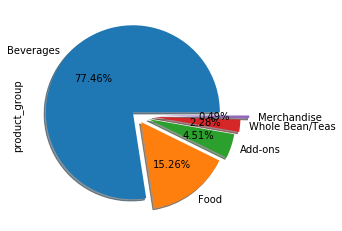

In [27]:
## No let us look at which was the most ordered products comes under whch group

data['product_group'].value_counts().plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=[0.05,0.1,0.15,0.2,0.3])

* We see that the major products group that was sold in the month of April is Beverages which 
  contributes to 80% of the sales.
  
* We can see that Food, Add-ons, Whole Bean/Teas, Merchandise provide less in contributing to 
  to the sales.

              LET US TAKE A LOOK AT THE MOST AND THE LEAST SELLING PRODUCTS?
                                WHAT CAN WE INFER?

In [28]:
## BEFORE THAT LET ME REMOVE THE SPACES FROM ALL PRODUCTS NAME TO HIGHLIGHT IT CLEARLY!


def conv(x):
    if ' ' in x:
        x=x.replace(' ','')
        return x
    else:
        return x
    
x=data['product'].apply(conv).to_list()

In [29]:
## LET ME IMPORT THE NECESSARY LIBRARIES TO CREATE A WORD CLOUD !

# !pip install wordcloud

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

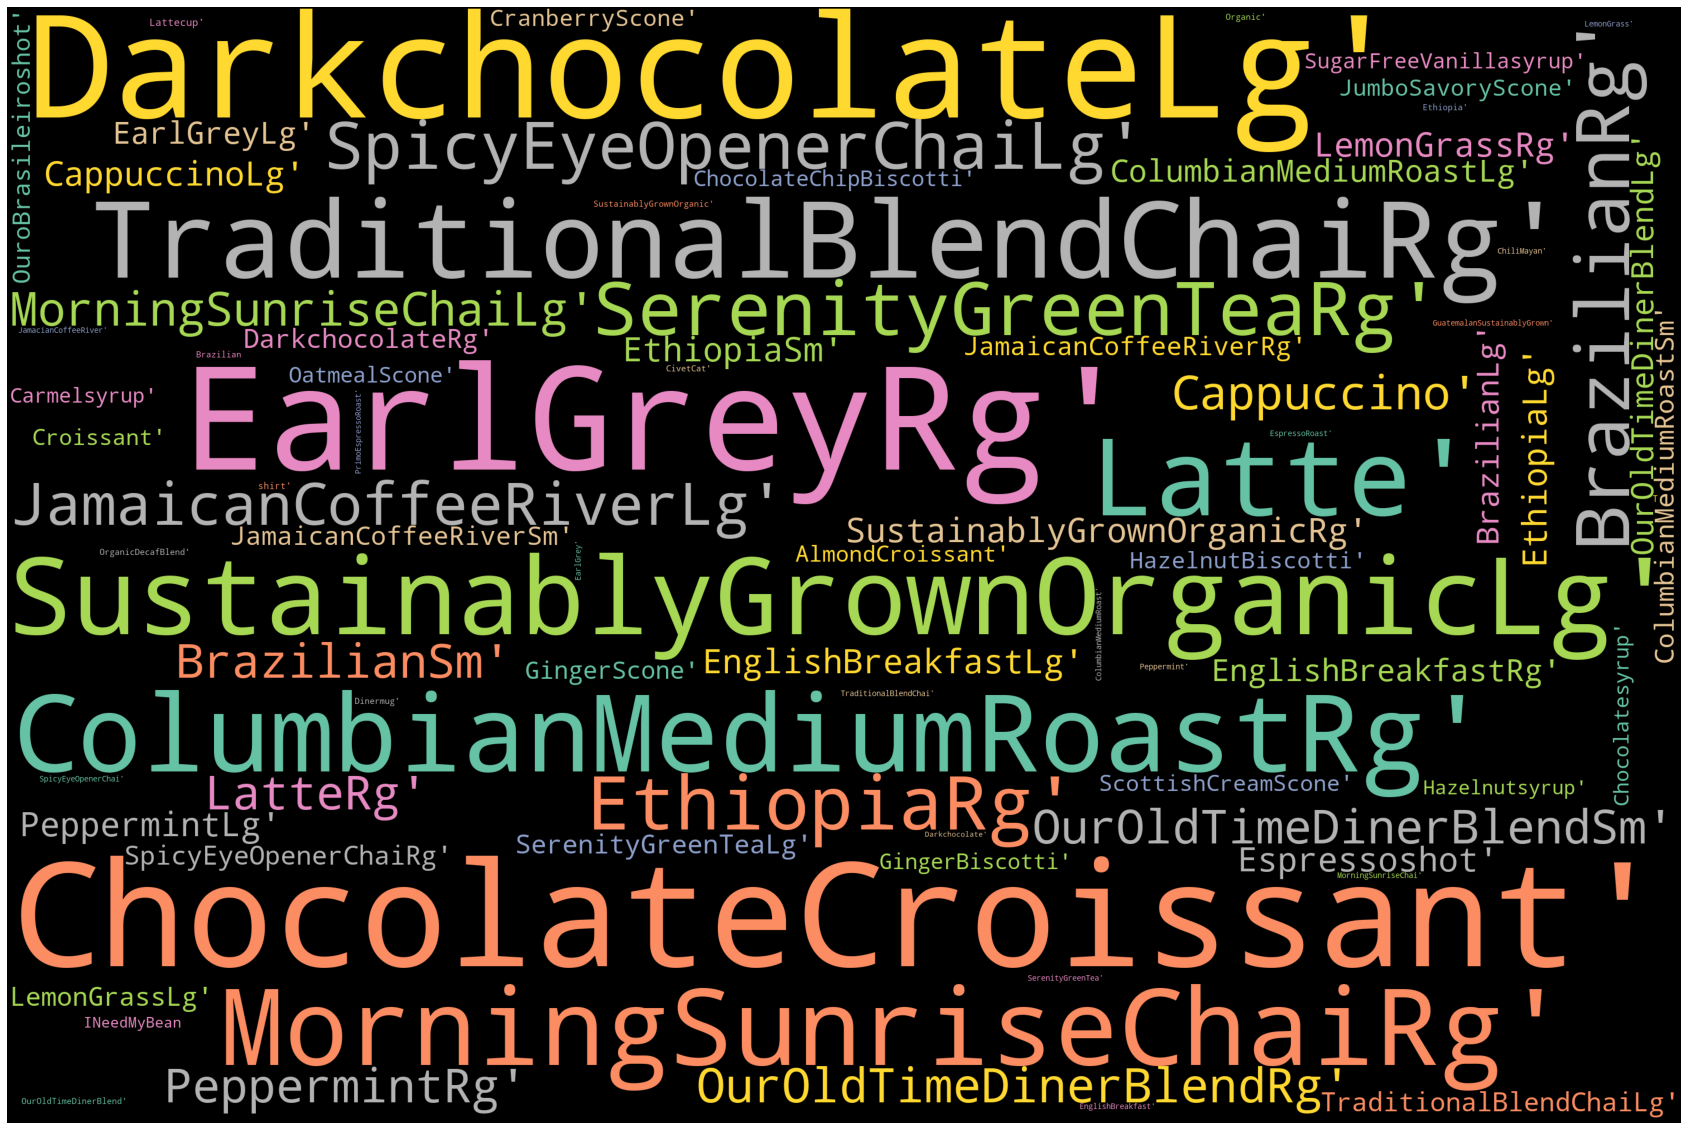

In [28]:
## DEFINING A FUNCTION FOR PLOTTING
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,30))
    plt.imshow(wordcloud)
    plt.axis('off')


## GENERATE WORD CLOUD 
wordcloud=WordCloud(width=3000,height=2000,random_state=1,
                    background_color='black',
                    stopwords=STOPWORDS,colormap='Set2',collocations=False).generate(str(x))

## PLOT 
plot_cloud(wordcloud)

* THE MOST SELLING PRODUCTS ARE:

  A.CHOCOLATE CROISSANT'
  
  B.DARK CHOCOLATE LG'
  
  C.MORNING SUNRISE CHAI RG'
  
  D.TRADITIONAL BLEND CHAI RG'
  
  E.EARL GREY RG'
  
  
  
* THE LEAST SELLING PRODUCTS ARE:

  A.GINGER BISCOTTI
  
  B.HAZELNUT BISCOTTI
  
  C.CROISSANT
  
  D.OAT MEAL SCONE 
  
  E.JAMAICAN COFFEE RIVER RG'
  
  
  
  
  
* One marketing strategy would be to take the least selling products and combine it with the 
  most selling compatible products to give exciting COMBO OFFERS! 
  
  THIS CAN BE DONE IN ORDER TO INCREASE THE SALES OF MY LEAST SELLING PRODUCTS!

In [30]:
## LET US PERFORM SOME DATA CLEANING ON THE CURRENT RETAIL PRICE SINCE IT IS IN STRING FORMAT:

data['current_retail_price']=data['current_retail_price'].str.replace('$','').astype(float)

                                     TEA VS COFFEE
                             WHICH IS MOST ORDERED BEVERAGE?
                  SHOULD I BRING IN MORE COFFEE OR TEA PRODUCTS TO INCREASE MY SALES

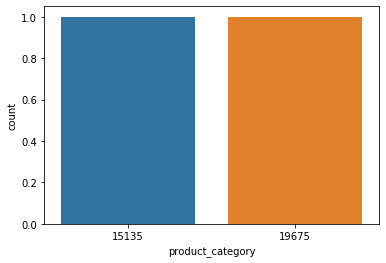

In [31]:
## LET US GET THE PROPORTION OF PEOPLE WHO ORDERED COFFEE AND ORDERED TEA

ser=data['product_category'].value_counts()[[0,1]]

sns.countplot(ser)

* WE NOTICE THAT EVEN THOUGH MORE PEOPLE HAVE ORDERED COFFEE THAN TEA THERE IS NO SIGNIFICANT 
  DIFFERENCE IN THE CHOICE BETWEEN TEA AND COFFEE


* BOTH SEEM TO BE BRINING EQUALLY GOOD SALES

        IN THE FOOD INDUSTRY ATTRACTIVE AMBIENCE PLAYS A MAJOR ROLE IN DRAWING CUSTOMERS 
                   DO PEOPLE PREFER TAKE HOME OR DINE IN AT HOJO MOJO!!??
                                    LETS FIND OUT 

In [32]:
data.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude  
0       40.761196  
1       40.761196

Text(0.5, 1.0, 'OUTLET_8')

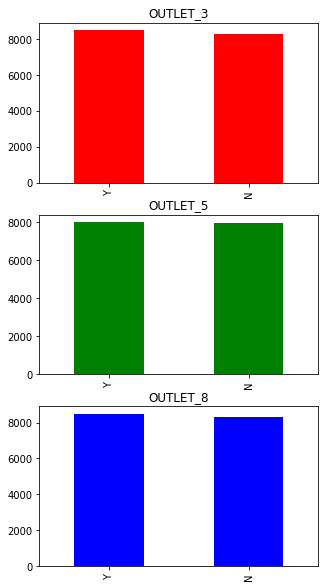

In [33]:
## LET ME DO A VALUE COUNTS 
data['instore_yn'].value_counts()

## SINCE WE HAVE 294 MISSING VALUES WE CAN ONLY TAKE THE YES AND NO COUNT AND SEE 
## WHAT WE CAN INFER

fig,axes=plt.subplots(3,1,figsize=(5,10))



data['instore_yn'][data['sales_outlet_id']==3].value_counts()[[0,1]].plot(kind='bar',ax=axes[0],color='r')

data['instore_yn'][data['sales_outlet_id']==5].value_counts()[[0,1]].plot(kind='bar',ax=axes[1],color='g')

data['instore_yn'][data['sales_outlet_id']==8].value_counts()[[0,1]].plot(kind='bar',ax=axes[2],color='b')



axes[0].set_title('OUTLET_3')


axes[1].set_title('OUTLET_5')


axes[2].set_title('OUTLET_8')

* LOOKS LIKE THERE IS NO MAJOR DIFFERENCE BETWEEN DINE IN AND TAKE HOME ORDERS.



* THERE ARE MORE ORDERS FOR DINE IN THAN TAKE HOME.



* WE CAN INFER THAT HOJO MOJO SHOULD BE HAVING A GOOD AMBIENCE AND IS BIG ENOUGH TO ACCOMODATE 
  PEOPLE, WHICH CAN INTURN DRAW MORE CUSTOMERS.

In [34]:
## LET ME MAKE A COPY OF THE DATA:

data2=data.copy()

In [35]:
## LET ME TRY TO GET ONLY THE HOUR OF TRANSACTION TIME INTO A DIFFERENT COLUMn:

data2['transaction_hour']=data2['transaction_time'].str.slice(0,2)

In [36]:
data2.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour  
0       40.761196               12  
1       40.761196               11

                           CAN WE TRY TO ANALYSE WHAT COULD BE 
                      THE MOST BUSIEST HOUR OF THE DAY FOR HOJO MOJO?

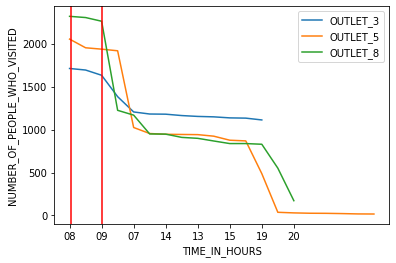

In [37]:
## FOR OUTLET 3,5,8:

data2['transaction_hour'][data2['sales_outlet_id']==3].value_counts().plot(kind='line',label='OUTLET_3')

data2['transaction_hour'][data2['sales_outlet_id']==5].value_counts().plot(kind='line',label='OUTLET_5')

data2['transaction_hour'][data2['sales_outlet_id']==8].value_counts().plot(kind='line',label='OUTLET_8')

plt.xlabel('TIME_IN_HOURS')

plt.ylabel('NUMBER_OF_PEOPLE_WHO_VISITED')

plt.axvline(0.1,color='r')

plt.axvline(2,color='r')

plt.legend()


* HOJO MOJO ENCOUNTERS A HUGE RUSH OF CUSTOMERS IN THE PRIME MORNING HOURS AROUND 8 TO 9 AM,
  THUS FACILITATING THE ONSET OF THEIR DAILY WORK SCHEDULE 

                        IS HOJO MOJO A WEEKDAY OR A WEEKEND PLACE?
                      OR IS THE PROPORTION OF PEOPLE SAME THROUGHOUT?
                                 WHAT CAN YOU INFER?

In [38]:
## LET ME MAKE A COLUMN TO DIFFERENTIATE BETWEEN WEEKDAY AND WEEKEND DATES:

data2['transaction_day']=data2['transaction_date'].dt.day

## LET US MAKE A LIST OF WEEKEND DATES:

weekend_lst=[6,7,13,14,20,21,27,28]

## DEFINING A FUNCTION:

def conv(x):
    if x in weekend_lst:
        return 'WEEKEND'
    else:
        return 'WEEKDAY'
    
data2['transaction_day']=data2['transaction_day'].apply(conv)

In [39]:
## STATISTICAL ANALYSIS :

## LET ME ASSUME THE NULL AND ALTERNATE HYPOTHESIS :

## NULL HYPOTHESIS :

## Proportion(of people who visit during weekday)=55%

## ALTERNATE HYPOTHESIS :

## Proportion(of people who visit during weekday)!=55%

from statsmodels.stats.proportion import proportions_ztest

tot_cust=len(data2)

weekday_visit=len(data2[data2['transaction_day']=='WEEKDAY'])

proportions_ztest(weekday_visit,tot_cust,0.55)

(89.33980422935426, 0.0)

In [40]:
# !pip install plotly

In [41]:
## WE SEE THAT THE PROPORTION OF PEOPLE WHO VISIT HOJO MOJO DURING WEEKDAYS IS WAY 
## DIFFERENT FROM OUR EXPECTATIONS:

import plotly.graph_objects as go

labels=['WEEKDAY_PROP','WEEKEND_PROP']

values=[data2['transaction_day'].value_counts()[0],data2['transaction_day'].value_counts()[1]]

fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.4)])

fig.show()

                                BEGINNING ,MID OR END OF
                                        MONTH SALES?
                                   WHICH WAS THE BEST ?

In [42]:
data2.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour transaction_day  
0       40.761196               12         WEEKDAY  
1       40.761196               11         WEEKDAY

In [43]:
## LET ME EXTRACT THE DAY AND MAKE IT A PARTICULAR COLUMN:

data2['transaction_day1']=data2['transaction_date'].dt.day

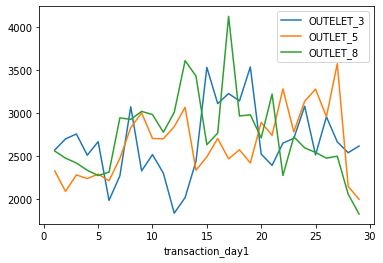

In [44]:
## FOR OUTLET 3,5,8 

data2[data2['sales_outlet_id']==3].groupby('transaction_day1')['line_item_amount'].sum().plot(kind='line',label='OUTELET_3')


data2[data2['sales_outlet_id']==5].groupby('transaction_day1')['line_item_amount'].sum().plot(kind='line',label='OUTLET_5')


data2[data2['sales_outlet_id']==8].groupby('transaction_day1')['line_item_amount'].sum().plot(kind='line',label='OUTLET_8')


plt.legend()

* LETS LOOK AT OUTLET_8,THEIER SALES START SLOW ,THEY REACH A PEAK AND DO GOOD IN THE MID TIME 
  OF THE MONTH AND THERE IS AGAIN A DIP IN SALES IN THE END OF MONTH.








* IN THE BEGINNING OF THE MONTH OUTLET_3 SEEMS TO STRUGGLE, REACHES SUDDEN PEAK SALES IN THE 
  MID MONTH, TRIES TO MAINTAIN AN AVERAGE LEVEL OF SALES DURING THE END OF MONTH.
  





* IN OUTLET_5,THEY HAVE VERY LESS SALES INFACT THE LEAST OUT OF ALL THE THREE OUTLETS,THEY 
  PERFORM FAIRLY WELL IN THE MID MONTH AND THERE IS A PROPORTIONAL INCREASE IN SALES BY THE 
  END OF THE MONTH.

                             LOYAL VS REGULAR CUSTOMERS?
                          LETS COMPARE THEIR CONTRIBUTION TO 
                              TO THE SALES IN HOJO MOJO     

In [45]:
data2.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour transaction_day  transaction_day1  
0       40.761196               12         WEEKDAY                 1  
1       40.761196               11         WEEKDAY                 1

In [46]:
## LET US FIRST CATEGORISE THE LOYAL AND REGULAR CUSTOMERS:

data2['LY_OR_RG']=data2['customer_id']

data2['LY_OR_RG']=data2['LY_OR_RG'].apply(lambda x:'REGULAR' if x==0 else 'LOYAL')

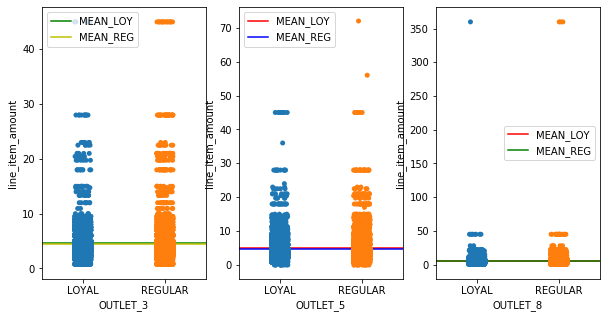

In [47]:
## LET US TRY TO PLOT A DISTRIBUTION PLOT AND SEE HOW MUCH SALES REGULAR AND LOYAL CUSTOMERS PROVIDE!

fig,axes=plt.subplots(1,3,figsize=(10,5))


## FOR OUTLET 3:

outlet_3=data2[data2['sales_outlet_id']==3]
sns.stripplot(outlet_3['LY_OR_RG'],outlet_3['line_item_amount'],ax=axes[0])
axes[0].axhline(outlet_3['line_item_amount'][outlet_3['LY_OR_RG']=='REGULAR'].mean(),color='g',label='MEAN_LOY')
axes[0].axhline(outlet_3['line_item_amount'][outlet_3['LY_OR_RG']=='LOYAL'].mean(),color='y',label='MEAN_REG')
axes[0].set(xlabel='OUTLET_3')
axes[0].legend()


## FOR OUTLET 5
outlet_5=data2[data2['sales_outlet_id']==5]
sns.stripplot(outlet_5['LY_OR_RG'],outlet_5['line_item_amount'],ax=axes[1])
axes[1].axhline(outlet_5['line_item_amount'][outlet_5['LY_OR_RG']=='REGULAR'].mean(),color='r',label='MEAN_LOY')
axes[1].axhline(outlet_5['line_item_amount'][outlet_5['LY_OR_RG']=='LOYAL'].mean(),color='b',label='MEAN_REG')
axes[1].set(xlabel='OUTLET_5')
axes[1].legend()

## FOR OUTLET 8:

outlet_8=data2[data2['sales_outlet_id']==8]
sns.stripplot(outlet_8['LY_OR_RG'],outlet_8['line_item_amount'],ax=axes[2])
axes[2].axhline(outlet_8['line_item_amount'][outlet_8['LY_OR_RG']=='REGULAR'].mean(),color='r',label='MEAN_LOY')
axes[2].axhline(outlet_8['line_item_amount'][outlet_8['LY_OR_RG']=='LOYAL'].mean(),color='g',label='MEAN_REG')
axes[2].set(xlabel='OUTLET_8')
axes[2].legend()



* THE MEAN PURCHASES OF LOYAL AND REGULAR CUSTOMERS ARE SAME ALMOST IN ALL THREE OUTLETS 



* WE SEE THAT IN OUTLET 3 AND OUTLET 5 THE AVERAGE SALES BY LOYAL CUSTOMERS ARE SLIGHLTY
  HIGHER THAN REGULAR CUSTOMERS .BUT NO SIGNIFICANT DIFFERENCE CAN BE NOTICED.
  
  
  
* WE CAN CONCLLUDE THAT IN TERMS OF CONTRIBUTION TO SALES PRICE REGULAR AND LOYAL CUSTOMERS 
  HAVE ALMOST CONTRBUTED TO THE SAME EXTENT.

                       LET US LOOK AT THE FREQUENCY OF VISITS 
                               BY LOYAL CUSTOMERS 

In [48]:
## LET US TRY TO LOOK AT THE FREQUENCY OF VISITS BY REGULAR AND LOYAL CUSTOMERS 

In [49]:
data2.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour transaction_day  transaction_day1 LY_OR_RG  
0       40.761196               12         WEEKDAY                 1    LOYAL  
1       40.761196               11         WEEKDAY                 1    LOYAL

Text(0.5, 1.0, 'LOYAL_CUSTOMERS')

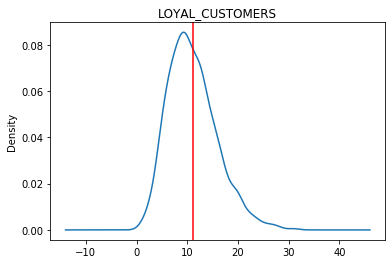

In [50]:
## LET ME TAKE ALL MY LOYAL CUSTOMERS AND SEE THEIR FREQUENCY OF VISIT:
data2[data2['customer_id']!=0].groupby('customer_id')['transaction_id'].count().plot(kind='kde',label='LOYAL_CUST')
plt.axvline(data2[data2['customer_id']!=0].groupby('customer_id')['transaction_id'].count().mean(),color='r')
plt.title('LOYAL_CUSTOMERS')

* THE AVERAGE VISITS BY A LOYAL CUSTOMERS IS APPROXIMATELY AROUND 11 TIMES IN THE MONTH OF APRIL


                LET US SEE IF THERE IS A VERY SIGNIFICANT DIFFERENCE BETWEEN WHOLE
                    SALE AND RETAIL PRICE OF A PRODUCT. IF SO WHAT CAN U INFER?

In [51]:
data.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude  
0       40.761196  
1       40.761196

                         LET US LOOK AT THE PROPORTION OF 
                    VISITS IN ALL THREE OUTLETS DURING APRIL MONTH

In [54]:
data2.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour transaction_day  transaction_day1 LY_OR_RG  
0       40.761196               12         WEEKDAY                 1    LOYAL  
1       40.761196               11         WEEKDAY                 1    LOYAL

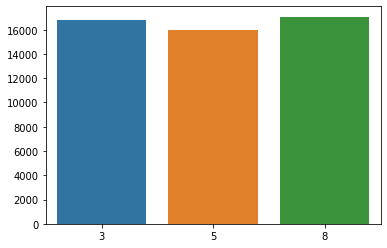

In [55]:
ser=data2['sales_outlet_id'].value_counts()

sns.barplot(ser.index,ser.values)

In [56]:
## LET US LOOK AT THE AREA WHERE ALL THREE OUTLETS:

## OUTLET_3= 1300 SQUARE FEET

## OUTLET_5= 900 SQUARE FEET 

## OUTLET_8= 1500 SQUARE FEET 

* WE SEE THAT THE PROPORTION OF PEOPLE WHO HAVE VISITED OUTLET 3 AND OUTLET 8 IS MORE COMPARED TO 
  OUTLET 5.
  
  
  
  
* THIS MIGHT BE DUE TO THE FACT THAT SIZE OF OUTLET_5 IS SMALL AND THERE COULD BE LESS POSSIBILTY 
  TO ACCOMODATE A LOT OF PEOPLE IN DINE IN . 
  
  
  
  
* LOCATION OF THE OUTLET MIGHT BE A FACTOR AS WELL.

                 NOW LET US LOOK AT THE PROFITS MADE BY ALL THREE OUTLETS?

In [57]:
data2.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour transaction_day  transaction_day1 LY_OR_RG  
0       40.761196               12         WEEKDAY                 1    LOYAL  
1       40.761196               11         WEEKDAY                 1    LOYAL

In [58]:
## LET ME TRY TO MAKE A SEPARATE COLUMNS:

data2['wholesale_tot']=data2['current_wholesale_price']*data2['quantity']

data2.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour transaction_day  transaction_day1 LY_OR_RG  \
0       40.761196               12         WEEKDAY                 1    LOYAL   
1       40.761196               11         WEEKDAY                 1    LOYAL   

   wholesale_tot  
0           0.63  
1           0.63

In [59]:
## LET US TRY TO SEPARTE THE DATA FRAME INTO THREE OUTLETS :

outlet_3=data2[data2['sales_outlet_id']==3]
outlet_5=data2[data2['sales_outlet_id']==5]
outlet_8=data2[data2['sales_outlet_id']==8]



In [60]:
profit_3=(outlet_3['line_item_amount'].sum())-(outlet_3['wholesale_tot'].sum())


profit_5=(outlet_5['line_item_amount'].sum())-(outlet_5['wholesale_tot'].sum())


profit_8=(outlet_8['line_item_amount'].sum())-(outlet_8['wholesale_tot'].sum())

In [61]:
print('THE NET PROFIT MADE BY OUTLET 3 IS',profit_3)

print('THE NET PROFIT MADE BY OUTLET 5 IS',profit_5)

print('THE NET PROFIFIT MADE BY OUTLET 8 IS',profit_8)

THE NET PROFIT MADE BY OUTLET 3 IS 48724.34999999999
THE NET PROFIT MADE BY OUTLET 5 IS 48511.33
THE NET PROFIFIT MADE BY OUTLET 8 IS 49019.66000000002


* WE SEE THAT OUTLET 8 HAS MADE THE MAXIMUM PROFIT.



* OUTLET_3 AND OUTLET_5 HAVE PERFORMED IN TO THE SAME LEVEL AND ACHIVED ALMOST THE 
  SAME PROFIT.

In [62]:
df7=pd.read_csv('Generations.csv')

In [63]:
## LET US LOOK A THE FIRST FIVE OBSERVATIONS:

df7.head()

birth_year    generation
0        1946  Baby Boomers
1        1947  Baby Boomers
2        1948  Baby Boomers
3        1949  Baby Boomers
4        1950  Baby Boomers

In [64]:
df4.head(2)

customer_id  home_store customer_first-name        customer_email  \
0            1           3           Kelly Key  Venus@adipiscing.edu   
1            2           3     Clark Schroeder        Nora@fames.gov   

  customer_since loyalty_card_number   birthdate gender  birth_year  
0     2017-01-04        908-424-2890  1950-05-29      M        1950  
1     2017-01-07        032-732-6308  1950-07-30      M        1950

In [65]:
## LET US TRY TO MERGE THE GENERATION AND THE LOYAL CUSTOMERS COLUMN:

data3=pd.merge(df4,df7,on='birth_year',how='inner')

data3.head(2)

customer_id  home_store customer_first-name        customer_email  \
0            1           3           Kelly Key  Venus@adipiscing.edu   
1            2           3     Clark Schroeder        Nora@fames.gov   

  customer_since loyalty_card_number   birthdate gender  birth_year  \
0     2017-01-04        908-424-2890  1950-05-29      M        1950   
1     2017-01-07        032-732-6308  1950-07-30      M        1950   

     generation  
0  Baby Boomers  
1  Baby Boomers

In [66]:
## LET US LOOK AT WHICH PROPORTION OF PEOPLE WHO BELONG TO DIFFERENT GENERATION:

ser=data3['generation'].value_counts()

import plotly.graph_objects as go

labels=['BABY_BOOMERS','GEN_X','OLDER_MILLENIALS','GEN_Z','YOUNGER_MILLENIALS']

values=[data3['generation'].value_counts()[0],data3['generation'].value_counts()[1],data3['generation'].value_counts()[2],data3['generation'].value_counts()[3],data3['generation'].value_counts()[4]]

fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.4)])

fig.show()

* HOJO MOJO SEEMS TO BE A MORE ATTRACTIVE PLACE FOR OLDER PEOPLE THAN THE CURRENT YOUNG
  GENERATION.
  
  
* WHAT COULD BE THE EFFECTIVE MARKETING STRATEGY TO ATTRACT MORE OF THE YOUNGER GENERATIONS?
      A. STUDENT COUPONS

In [67]:
## LET US TRY TO GET ALL THE INFORMATION OF THE LOYAL CUSTOMERS:

data_loyal=pd.merge(data2,data3,on='customer_id',how='inner')


                   I HAVE DECIDED TO GIVE FEW COUPONS TO TOP 3 
                 CUSTOMERS WHO HAVE VISITED HOJO MOJO MOST FREQUENTLY?

In [68]:
data_loyal.head(2)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1            1539       2019-04-01         16:49:47                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12          558          N      1             1          29   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   

  product_category           product_type                    product  \
0              Tea        Brewed Chai tea  Traditional Blend Chai Rg   
1           Coffee  Gourmet brewed coffee  Columbian Medium Roast Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1     A smooth cup of coffee any time of day.            16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.50                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   

   store_latitude transaction_hour transaction_day  transaction_day1 LY_OR_RG  \
0       40.761196               12         WEEKDAY                 1    LOYAL   
1       40.761196               16         WEEKDAY                 1    LOYAL   

   wholesale_tot  home_store customer_first-name customer_email  \
0           0.63           3     Melissa Johnson  Luke@eget.net   
1           0.50           3     Melissa Johnson  Luke@eget.net   

  customer_since loyalty_card_number   birthdate gender  birth_year  \
0     2018-06-19        816-924-9433  1983-02-25      F        1983   
1     2018-06-19        816-924-9433  1983-02-25      F        1983   

          generation  
0  Older Millennials  
1  Older Millennials

In [69]:
data_loyal.groupby('customer_id')['transaction_id'].count().sort_values(ascending=False).head(8)

customer_id
548     31
8285    31
3       31
8341    29
8158    28
8118    28
8009    28
8036    28
Name: transaction_id, dtype: int64

* WE SEE THAT CUSTOMER WITH ID 548,8285 AND 3 HAVE VISITED HOJO MOJO AROUND 31 TIMES



* FOLLOWED BY CUSTOMER WITH ID 8341 WHO HAS VISITED AROUND 29 TIMES



* CUSTOMER ID 8158,8118,8009 AND 8036 HAVE VISTED HOJO MOJO AROUND 28 TIMES

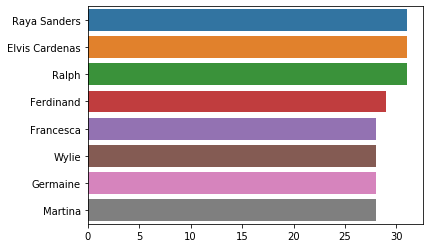

In [70]:
top_best=data_loyal.groupby('customer_id')['transaction_id'].count().sort_values(ascending=False).head(8).index.to_list()

top_best_freq=data_loyal.groupby('customer_id')['transaction_id'].count().sort_values(ascending=False).head(8).values


names=data_loyal['customer_first-name'][data_loyal['customer_id'].isin(top_best)].unique()

sns.barplot(top_best_freq,names)

                    LET US DO A SIMPLE ANALYSIS ON THE LATEST 
                     ADDITION TO OUR OUTLET !! YES IT PASTRIES :)

In [71]:
df8=pd.read_csv('pastry inventory.csv')

In [72]:
## LET US LOOK AT THE TOP 5 ROWS:

df8.head()

sales_outlet_id transaction_date  product_id  start_of_day  quantity_sold  \
0                3         4/1/2019          69            18              8   
1                3         4/1/2019          70            18             12   
2                3         4/1/2019          71            18              8   
3                3         4/1/2019          72            48              9   
4                3         4/1/2019          73            18              9   

   waste % waste  
0     10     56%  
1      6     33%  
2     10     56%  
3     39     81%  
4      9     50%

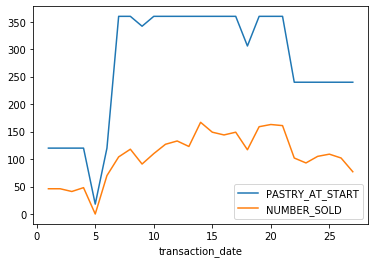

In [73]:
## LET US CONVERT THE TRANSACTION DATE TO DAY COLUMN SINCE ALL THE TRANSACTIONS ARE 
## IN THE MONTH APRIL AND YEAR 2019

df8['transaction_date']=pd.to_datetime(df8['transaction_date']).dt.day

pastry_start=df8.groupby('transaction_date')['start_of_day'].sum()

pastry_end=df8.groupby('transaction_date')['quantity_sold'].sum()

sns.lineplot(pastry_start.index,pastry_start.values,label='PASTRY_AT_START')

sns.lineplot(pastry_end.index,pastry_end.values,label='NUMBER_SOLD')

plt.legend()

* WE SEE THAT THERE IS A MAJOR DIFFERENCE BETWEEN DIFFERENCE IN THE NUMBER OF PASTRIES 
  AVAILABLE TO THE ONES THAT IS SOLD.
  
  
    
* IT DOSENT SEEM LIKE THE INVENTORY OF PASTRIES IS ADDING TO THE SALES OF HOJO MOJO.



* SO LARGE AMOUNT OF PASTRIES SEEM TO BE WASTED WHICH COULD MEAN MAJOR LOSS.

                        FEATURE ENGINEERING FOR CUSTOMER SEGMENTATION

In [74]:



## LET US HAVE A LOOK AT THE DATA FIRST:

data.head(3)

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   
2             326       2019-04-01         12:05:31                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   
2        12          659          N      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   
2         2               5.0         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
2              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   
2  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   
2                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
2              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   
2       14               1300  Long Island City       -73.924008   

   store_latitude  
0       40.761196  
1       40.761196  
2       40.761196

In [75]:
df_new=data[data['customer_id']!=0]

df_new.head()

transaction_id transaction_date transaction_time  sales_outlet_id  \
0               7       2019-04-01         12:04:43                3   
1             249       2019-04-01         11:15:38                3   
2             326       2019-04-01         12:05:31                3   
3             497       2019-04-01         16:49:38                3   
4             541       2019-04-01         19:17:34                3   

   staff_id  customer_id instore_yn  order  line_item_id  product_id  \
0        12          558          N      1             1          52   
1        12           22          Y      1             1          52   
2        12          659          N      1             1          52   
3        12          407          Y      1             1          52   
4        12          537          Y      1             1          52   

   quantity  line_item_amount  unit_price promo_item_yn product_group  \
0         1               2.5         2.5             N     Beverages   
1         1               2.5         2.5             N     Beverages   
2         2               5.0         2.5             N     Beverages   
3         1               2.5         2.5             N     Beverages   
4         2               5.0         2.5             N     Beverages   

  product_category     product_type                    product  \
0              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
1              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
2              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
3              Tea  Brewed Chai tea  Traditional Blend Chai Rg   
4              Tea  Brewed Chai tea  Traditional Blend Chai Rg   

                           product_description unit_of_measure  \
0  Sit back and think of the tropical breezes.           16 oz   
1  Sit back and think of the tropical breezes.           16 oz   
2  Sit back and think of the tropical breezes.           16 oz   
3  Sit back and think of the tropical breezes.           16 oz   
4  Sit back and think of the tropical breezes.           16 oz   

   current_wholesale_price  current_retail_price tax_exempt_yn promo_yn  \
0                     0.63                   2.5             Y        N   
1                     0.63                   2.5             Y        N   
2                     0.63                   2.5             Y        N   
3                     0.63                   2.5             Y        N   
4                     0.63                   2.5             Y        N   

  new_product_yn first_name last_name         position start_date   Date_ID  \
0              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
1              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
2              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
3              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   
4              N   Britanni    Jorden  Coffee Wrangler  3/25/2006  20190401   

   Week_ID  store_square_feet        store_city  store_longitude  \
0       14               1300  Long Island City       -73.924008   
1       14               1300  Long Island City       -73.924008   
2       14               1300  Long Island City       -73.924008   
3       14               1300  Long Island City       -73.924008   
4       14               1300  Long Island City       -73.924008   

   store_latitude  
0       40.761196  
1       40.761196  
2       40.761196  
3       40.761196  
4       40.761196

In [76]:
## LET ME MAKE AN EMPTY DATA FRAME TO KEEP ADDING THE NEW DERIVED FEATURES:

fin_df=pd.DataFrame()

In [77]:
## FEATURE 1:

## QUANTITY OF PRODUCT PURCHASED:

ser1=df_new.groupby('customer_id')['quantity'].sum()

ser1.sort_index(inplace=True)

In [78]:
## FEATURE 2:

## FREQUENCY OF VISIT:

ser2=df_new.groupby('customer_id')['transaction_id'].count()

ser2.sort_index(inplace=True)

In [79]:
## FEATURE 3:

new_df=pd.merge(df_new,df4,on='customer_id',how='inner')

ser3=new_df[['customer_id','customer_since']].drop_duplicates().set_index('customer_id')

In [80]:
## FEATURE 4:

## WEEKLY AMOUNT SPENT :

## IN WEEK 1:

data1=df_new[['customer_id','transaction_date','line_item_amount']]

week_1=data1[(data1['transaction_date'].dt.day>=1)&(data1['transaction_date'].dt.day<=7)]


week_1=week_1.groupby('customer_id')['line_item_amount'].sum()


week_1.sort_index(inplace=True)

In [81]:
## FEATURE 5:

## WEEKLY AMOUNT SPENT :

## IN WEEK 2:



week_2=data1[(data1['transaction_date'].dt.day>=8)&(data1['transaction_date'].dt.day<=14)]


week_2=week_2.groupby('customer_id')['line_item_amount'].sum()



week_2.sort_index(inplace=True)

In [82]:
## FEATURE 6:

## WEEKLY AMOUNT SPENT :

## IN WEEK 3:



week_3=data1[(data1['transaction_date'].dt.day>=15)&(data1['transaction_date'].dt.day<=21)]


week_3=week_3.groupby('customer_id')['line_item_amount'].sum()


week_3.sort_index(inplace=True)

In [83]:
## FEATURE 7:

## WEEKLY AMOUNT SPENT :

## IN WEEK 4:



week_4=data1[(data1['transaction_date'].dt.day>=22)&(data1['transaction_date'].dt.day<=29)]


week_4=week_4.groupby('customer_id')['line_item_amount'].sum()


week_4.sort_index(inplace=True)

In [84]:
## FEATURE 8 :

## RECENCY :

data2=df_new[['customer_id','transaction_date']]

date_val=pd.DataFrame(data2.groupby('customer_id')['transaction_date'].max())

date_val['Recency']=pd.to_datetime('2019-05-01')-date_val['transaction_date']




date_val.drop('transaction_date',axis=1,inplace=True)



In [85]:
## A FINAL VIEW AT RECENCY:

date_val.sort_index(inplace=True)

In [86]:
## LET US CREATE A NEW DATA FRAME WITH FEATURES DERIVED AS OF NOW:

fin_df['QUANTITY_PURCHASED']=ser1

fin_df['FREQUENCY']=ser2

fin_df['RECENCY']=date_val['Recency']


fin_df=pd.merge(fin_df,ser3,left_index=True,right_index=True)

fin_df=pd.merge(fin_df,week_1,how='outer',left_index=True,right_index=True)

fin_df=pd.merge(fin_df,week_2,how='outer',left_index=True,right_index=True)

fin_df.rename(columns={'line_item_amount_x':'WEEK1_AMOUNT_SPENT','line_item_amount_y':'WEEK2_AMOUNT_SPENT'},inplace=True)

fin_df=pd.merge(fin_df,week_3,how='outer',left_index=True,right_index=True)

fin_df=pd.merge(fin_df,week_4,how='outer',left_index=True,right_index=True)

fin_df.rename(columns={'line_item_amount_x':'WEEK3_AMOUNT_SPENT','line_item_amount_y':'WEEK4_AMOUNT_SPENT'},inplace=True)

fin_df

QUANTITY_PURCHASED  FREQUENCY RECENCY customer_since  \
customer_id                                                         
1                          11.0        8.0  2 days     2017-01-04   
2                          27.0       21.0  5 days     2017-01-07   
3                          45.0       31.0  7 days     2017-01-10   
4                          10.0        9.0  5 days     2017-01-13   
5                           8.0        6.0  2 days     2017-01-15   
...                         ...        ...     ...            ...   
8497                       18.0       12.0  6 days     2017-01-06   
8498                       14.0        9.0  4 days     2019-01-20   
8499                       18.0       12.0  2 days     2017-11-09   
8500                       30.0       21.0  5 days     2017-08-21   
8501                        9.0        6.0  3 days     2018-07-06   

             WEEK1_AMOUNT_SPENT  WEEK2_AMOUNT_SPENT  WEEK3_AMOUNT_SPENT  \
customer_id                                                               
1                          6.00                 NaN                8.00   
2                         42.10                3.00               17.00   
3                         37.40               71.20               75.55   
4                         14.75                4.70                4.55   
5                          8.00                7.50                 NaN   
...                         ...                 ...                 ...   
8497                      20.20               19.15               21.75   
8498                      11.00               12.75                6.00   
8499                      26.45                5.00               14.55   
8500                      17.50               44.15               24.95   
8501                      19.75                 NaN                 NaN   

             WEEK4_AMOUNT_SPENT  
customer_id                      
1                         15.20  
2                         28.25  
3                          4.75  
4                          4.75  
5                          8.00  
...                         ...  
8497                       4.90  
8498                      10.00  
8499                      12.10  
8500                       4.25  
8501                       9.00  

[2247 rows x 8 columns]

In [87]:
## RENAMING THE CUSTOMER SINCE COLUMN AND MAKING IT CAPS:

fin_df=fin_df.rename(columns={'customer_since':'CUSTOMER_SINCE'})

fin_df.head(3)

QUANTITY_PURCHASED  FREQUENCY RECENCY CUSTOMER_SINCE  \
customer_id                                                         
1                          11.0        8.0  2 days     2017-01-04   
2                          27.0       21.0  5 days     2017-01-07   
3                          45.0       31.0  7 days     2017-01-10   

             WEEK1_AMOUNT_SPENT  WEEK2_AMOUNT_SPENT  WEEK3_AMOUNT_SPENT  \
customer_id                                                               
1                           6.0                 NaN                8.00   
2                          42.1                 3.0               17.00   
3                          37.4                71.2               75.55   

             WEEK4_AMOUNT_SPENT  
customer_id                      
1                         15.20  
2                         28.25  
3                          4.75

In [88]:
## FEATURE 9:

## STAR PURCHASE BY THE CUSTOMER :

ser4=df_new.groupby('customer_id')['line_item_amount'].max()

fin_df=pd.merge(fin_df,ser4,how='inner',left_index=True,right_index=True)



fin_df

QUANTITY_PURCHASED  FREQUENCY RECENCY CUSTOMER_SINCE  \
customer_id                                                         
1                          11.0        8.0  2 days     2017-01-04   
2                          27.0       21.0  5 days     2017-01-07   
3                          45.0       31.0  7 days     2017-01-10   
4                          10.0        9.0  5 days     2017-01-13   
5                           8.0        6.0  2 days     2017-01-15   
...                         ...        ...     ...            ...   
8497                       18.0       12.0  6 days     2017-01-06   
8498                       14.0        9.0  4 days     2019-01-20   
8499                       18.0       12.0  2 days     2017-11-09   
8500                       30.0       21.0  5 days     2017-08-21   
8501                        9.0        6.0  3 days     2018-07-06   

             WEEK1_AMOUNT_SPENT  WEEK2_AMOUNT_SPENT  WEEK3_AMOUNT_SPENT  \
customer_id                                                               
1                          6.00                 NaN                8.00   
2                         42.10                3.00               17.00   
3                         37.40               71.20               75.55   
4                         14.75                4.70                4.55   
5                          8.00                7.50                 NaN   
...                         ...                 ...                 ...   
8497                      20.20               19.15               21.75   
8498                      11.00               12.75                6.00   
8499                      26.45                5.00               14.55   
8500                      17.50               44.15               24.95   
8501                      19.75                 NaN                 NaN   

             WEEK4_AMOUNT_SPENT  line_item_amount  
customer_id                                        
1                         15.20              6.20  
2                         28.25             12.00  
3                          4.75             23.00  
4                          4.75              6.00  
5                          8.00              7.50  
...                         ...               ...  
8497                       4.90             14.75  
8498                      10.00              7.00  
8499                      12.10              9.50  
8500                       4.25              8.00  
8501                       9.00              6.00  

[2247 rows x 9 columns]

In [89]:
## RENAMING THE COLUMN:


fin_df=fin_df.rename(columns={'line_item_amount':'STAR_PURCHASE'})

fin_df.head(3)

QUANTITY_PURCHASED  FREQUENCY RECENCY CUSTOMER_SINCE  \
customer_id                                                         
1                          11.0        8.0  2 days     2017-01-04   
2                          27.0       21.0  5 days     2017-01-07   
3                          45.0       31.0  7 days     2017-01-10   

             WEEK1_AMOUNT_SPENT  WEEK2_AMOUNT_SPENT  WEEK3_AMOUNT_SPENT  \
customer_id                                                               
1                           6.0                 NaN                8.00   
2                          42.1                 3.0               17.00   
3                          37.4                71.2               75.55   

             WEEK4_AMOUNT_SPENT  STAR_PURCHASE  
customer_id                                     
1                         15.20            6.2  
2                         28.25           12.0  
3                          4.75           23.0

In [90]:
## FEATURE 10:

import scipy.stats as stats 
from scipy.stats import mode 

ser=df_new.groupby('customer_id')['product_type'].apply(lambda x:x.mode()[0])

ser.sort_index(inplace=True)

In [91]:
## MERGING FEATURE 10 WITH THE EXISTING DATA:

fin_df=pd.merge(fin_df,ser,how='inner',left_index=True,right_index=True)

In [92]:
## RENAMING THE COLUMN:

fin_df=fin_df.rename(columns={'product_type':'PRODUCT_PREFERENCE'})

In [93]:
fin_df['RECENCY']=fin_df['RECENCY'].astype(str).str.split(' ').apply(lambda x:x[0])

In [94]:
fin_df['CUSTOMER_SINCE']=(pd.to_datetime('2019-05-01')-pd.to_datetime(fin_df['CUSTOMER_SINCE'])).astype(str).str.split(' ').apply(lambda x:x[0])

In [95]:
## OUR FINAL DATA FRAME AFTER FEATURE ENGINEERING:

fin_df.head(3)

QUANTITY_PURCHASED  FREQUENCY RECENCY CUSTOMER_SINCE  \
customer_id                                                         
1                          11.0        8.0       2            847   
2                          27.0       21.0       5            844   
3                          45.0       31.0       7            841   

             WEEK1_AMOUNT_SPENT  WEEK2_AMOUNT_SPENT  WEEK3_AMOUNT_SPENT  \
customer_id                                                               
1                           6.0                 NaN                8.00   
2                          42.1                 3.0               17.00   
3                          37.4                71.2               75.55   

             WEEK4_AMOUNT_SPENT  STAR_PURCHASE     PRODUCT_PREFERENCE  
customer_id                                                            
1                         15.20            6.2  Gourmet brewed coffee  
2                         28.25           12.0       Brewed Black tea  
3                          4.75           23.0        Brewed Chai tea

                                 NULL VALUE IMPUTATION

In [96]:
## LET US LOOK AT THE NUMBER OF NULL VALUES EACH COLUMN HAVE:

null_val_data=pd.DataFrame(data={'null_value_count':fin_df.isnull().sum(),'null_value_percentage':(fin_df.isnull().sum()/len(fin_df))*100})

null_val_data

null_value_count  null_value_percentage
QUANTITY_PURCHASED                 2               0.089008
FREQUENCY                          2               0.089008
RECENCY                            0               0.000000
CUSTOMER_SINCE                     0               0.000000
WEEK1_AMOUNT_SPENT                71               3.159769
WEEK2_AMOUNT_SPENT               333              14.819760
WEEK3_AMOUNT_SPENT               802              35.692034
WEEK4_AMOUNT_SPENT               387              17.222964
STAR_PURCHASE                      0               0.000000
PRODUCT_PREFERENCE                 0               0.000000

In [97]:
## WE SEE THAT COLUMNS :
## WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT
## HAVE BETWEEN 3 TO 35% OF NULL VALUES WHICH CAN BE IMPUTED WITH 0 SINCE THOSE CUSTOMERS 
## MIGHT NO HAVE VISITED THE CAFE AT THAT PARTIVULAR WEEK:

fin_df['WEEK1_AMOUNT_SPENT'].fillna(0,inplace=True)
fin_df['WEEK2_AMOUNT_SPENT'].fillna(0,inplace=True)
fin_df['WEEK3_AMOUNT_SPENT'].fillna(0,inplace=True)
fin_df['WEEK4_AMOUNT_SPENT'].fillna(0,inplace=True)

In [98]:
## SINCE IN QUANTITY PURCHASED COLUMN AND FREQUENCY HAVE ONLY TWO NULL VALUES WE CAN DROP IT :

fin_df=fin_df.dropna(subset=['QUANTITY_PURCHASED','FREQUENCY'])

                                       ENCODING 

In [99]:
fin_df.dtypes

QUANTITY_PURCHASED    float64
FREQUENCY             float64
RECENCY                object
CUSTOMER_SINCE         object
WEEK1_AMOUNT_SPENT    float64
WEEK2_AMOUNT_SPENT    float64
WEEK3_AMOUNT_SPENT    float64
WEEK4_AMOUNT_SPENT    float64
STAR_PURCHASE         float64
PRODUCT_PREFERENCE     object
dtype: object

In [100]:
## WE SEE THAT WE HAVE ONE CATEGORICAL COLUMN THAT IS PRODUCT PREFERENCE:

## WE WILL GO FOR FREQUENCY ENCODING:

fin_df['PRODUCT_PREFERENCE']=fin_df['PRODUCT_PREFERENCE'].map(fin_df['PRODUCT_PREFERENCE'].value_counts(normalize=True).to_dict())

In [101]:
# To check for datatypes:
fin_df.dtypes

QUANTITY_PURCHASED    float64
FREQUENCY             float64
RECENCY                object
CUSTOMER_SINCE         object
WEEK1_AMOUNT_SPENT    float64
WEEK2_AMOUNT_SPENT    float64
WEEK3_AMOUNT_SPENT    float64
WEEK4_AMOUNT_SPENT    float64
STAR_PURCHASE         float64
PRODUCT_PREFERENCE    float64
dtype: object

In [102]:
fin_df['RECENCY'] = fin_df['RECENCY'].astype(int)

In [103]:
fin_df['CUSTOMER_SINCE'] = fin_df['CUSTOMER_SINCE'].astype(int)

In [104]:
## LET US HAVE A LOOK AT THE FINAL DATA AGAIN:

fin_df.head(3)

QUANTITY_PURCHASED  FREQUENCY  RECENCY  CUSTOMER_SINCE  \
customer_id                                                           
1                          11.0        8.0        2             847   
2                          27.0       21.0        5             844   
3                          45.0       31.0        7             841   

             WEEK1_AMOUNT_SPENT  WEEK2_AMOUNT_SPENT  WEEK3_AMOUNT_SPENT  \
customer_id                                                               
1                           6.0                 0.0                8.00   
2                          42.1                 3.0               17.00   
3                          37.4                71.2               75.55   

             WEEK4_AMOUNT_SPENT  STAR_PURCHASE  PRODUCT_PREFERENCE  
customer_id                                                         
1                         15.20            6.2            0.134967  
2                         28.25           12.0            0.117595  
3                          4.75           23.0            0.202673

In [105]:
## NOW WE SEE THAT THE DATA IS FREE OF NULL VALUES AND THE CATEGORICAL COLUMN IS ENCODED 
## WE CAN BUILD THE MODEL FOR CUSTOMER SEGMENTATION NOW ! 

In [106]:
# Making copy:
data = fin_df.copy()
data.head()

QUANTITY_PURCHASED  FREQUENCY  RECENCY  CUSTOMER_SINCE  \
customer_id                                                           
1                          11.0        8.0        2             847   
2                          27.0       21.0        5             844   
3                          45.0       31.0        7             841   
4                          10.0        9.0        5             838   
5                           8.0        6.0        2             836   

             WEEK1_AMOUNT_SPENT  WEEK2_AMOUNT_SPENT  WEEK3_AMOUNT_SPENT  \
customer_id                                                               
1                          6.00                 0.0                8.00   
2                         42.10                 3.0               17.00   
3                         37.40                71.2               75.55   
4                         14.75                 4.7                4.55   
5                          8.00                 7.5                0.00   

             WEEK4_AMOUNT_SPENT  STAR_PURCHASE  PRODUCT_PREFERENCE  
customer_id                                                         
1                         15.20            6.2            0.134967  
2                         28.25           12.0            0.117595  
3                          4.75           23.0            0.202673  
4                          4.75            6.0            0.036526  
5                          8.00            7.5            0.117595

In [107]:
# Final Dataframe with Features:
data.dtypes

QUANTITY_PURCHASED    float64
FREQUENCY             float64
RECENCY                 int32
CUSTOMER_SINCE          int32
WEEK1_AMOUNT_SPENT    float64
WEEK2_AMOUNT_SPENT    float64
WEEK3_AMOUNT_SPENT    float64
WEEK4_AMOUNT_SPENT    float64
STAR_PURCHASE         float64
PRODUCT_PREFERENCE    float64
dtype: object

In [108]:
customer_level=data.to_csv("customer_level_dataframe.csv")